# WeatherPy

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [159]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [160]:
# Save config information, set units to farenheight
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=037cbe9c59c7410d2539726c040dffc9&units=imperial&q=


In [161]:
# Create data frame for cities selected above to store city data in
df = pd.DataFrame(cities, columns=["City Name"])

df['city'] = ""
df['cloudiness'] = ""
df['country'] = ""
df['date'] = ""
df['humidity'] = ""
df['latitude'] = ""
df['longitude'] = ""
df['max temp'] = ""
df['wind speed'] = ""

In [162]:
# Interate through city list and grab data through API call, print log of each processed city
for index, row in df.iterrows():
    city = row['City Name']
    response = requests.get(query_url + city).json()
    
    # Store data for cities with data into data frame, print to log each processed city
    try: 
        print(f"The city information received is: {city} (id={response['id']})")
        
        df.loc[index, 'city'] = response['name']
        df.loc[index, 'cloudiness'] = response['clouds']['all']
        df.loc[index, 'country'] = response['sys']['country']
        df.loc[index, 'date'] = response['dt']
        df.loc[index, 'humidity'] = response['main']['humidity']
        df.loc[index, 'latitude'] = response['coord']['lat']
        df.loc[index, 'longitude'] = response['coord']['lon']
        df.loc[index, 'max temp'] = response['main']['temp_max']
        df.loc[index, 'wind speed'] = response['wind']['speed']
    
    # Skip cities that do not have data
    except(KeyError, IndexError):
        print("Missing field/result... skipping.")

The city information received is: huarmey (id=3939168)
The city information received is: new norfolk (id=2155415)
The city information received is: souillac (id=3026644)
The city information received is: naron (id=3115739)
The city information received is: turbat (id=1163054)
The city information received is: mar del plata (id=3863379)
The city information received is: georgetown (id=3378644)
The city information received is: teahupoo (id=4033543)
The city information received is: cheremukhovo (id=466423)
The city information received is: rikitea (id=4030556)
The city information received is: sorland (id=3137469)
The city information received is: chuy (id=3443061)
The city information received is: bethel (id=5880568)
The city information received is: busselton (id=2075265)
The city information received is: butaritari (id=2110227)
The city information received is: mataura (id=6201424)
The city information received is: kapaa (id=5848280)
The city information received is: jambi (id=164285

The city information received is: troutdale (id=5757477)
The city information received is: nantucket (id=4944903)
The city information received is: yumen (id=1528998)
The city information received is: laranjeiras do sul (id=3458746)
The city information received is: kondinskoye (id=1502697)
Missing field/result... skipping.
The city information received is: nioro (id=2413070)
The city information received is: college (id=5859699)
The city information received is: longyearbyen (id=2729907)
The city information received is: patti (id=1260045)
Missing field/result... skipping.
The city information received is: ipilan (id=1710590)
The city information received is: teknaf (id=1185095)
The city information received is: ugoofaaru (id=1337619)
The city information received is: torbay (id=6167817)
The city information received is: porto empedocle (id=6541341)
Missing field/result... skipping.
The city information received is: piopio (id=3874453)
The city information received is: beringovskiy (i

The city information received is: massakory (id=2428228)
The city information received is: caravelas (id=3466980)
The city information received is: algiers (id=4335045)
The city information received is: okhotsk (id=2122605)
The city information received is: makakilo city (id=5850554)
The city information received is: paka (id=2386756)
The city information received is: kohima (id=1266366)
The city information received is: lingao (id=1803560)
The city information received is: nurota (id=1513087)
Missing field/result... skipping.
The city information received is: les cayes (id=3728097)
The city information received is: fuxin (id=2037346)
The city information received is: zhigansk (id=2012530)
The city information received is: oda (id=1854774)
The city information received is: najran (id=103630)
The city information received is: channel-port aux basques (id=5919815)
The city information received is: sept-iles (id=6144312)
The city information received is: port macquarie (id=2152659)
The ci

The city information received is: lebu (id=344979)
The city information received is: ternate (id=1682474)
The city information received is: san pedro (id=3428576)
The city information received is: tautira (id=4033557)
The city information received is: rivera (id=3440781)
Missing field/result... skipping.
The city information received is: taloqan (id=1123004)
The city information received is: udachnyy (id=2014624)
The city information received is: hanmer springs (id=2190299)
The city information received is: isla mujeres (id=3526756)
The city information received is: zaranj (id=1120985)
The city information received is: cockburn town (id=3576994)
The city information received is: chatellerault (id=3026141)
Missing field/result... skipping.
The city information received is: pemba (id=1028918)
Missing field/result... skipping.
The city information received is: kidal (id=2455290)
The city information received is: kysyl-syr (id=2021017)
The city information received is: kupang (id=2057087)


The city information received is: vanimo (id=2084442)
The city information received is: kishtwar (id=1266475)
The city information received is: papara (id=3395473)
The city information received is: lar (id=133595)
The city information received is: mahanoro (id=1062553)
The city information received is: barabai (id=1650064)
The city information received is: touros (id=3386213)
The city information received is: bendigo (id=2176187)
The city information received is: kalemie (id=214974)
The city information received is: broken hill (id=2173911)
The city information received is: palana (id=2122262)
The city information received is: hokitika (id=2206894)
The city information received is: villa san giovanni (id=3173435)
The city information received is: le port (id=3036965)
The city information received is: vardo (id=4372777)
The city information received is: oussouye (id=2246901)
The city information received is: iwaki (id=2112539)
The city information received is: ubinskoye (id=1488708)
The

In [163]:
# Clean up data frame

# Only keep records with data
complete_df = df.loc[df["city"] != ""]

# Derive date from unix date time variable
complete_df_copy=complete_df.copy()
complete_df_copy['date'] = pd.to_datetime(complete_df['date'],unit='s')
complete_df_copy['date only'] = complete_df_copy['date'].dt.date

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [164]:
# Export data to csv
complete_df_copy.to_csv("cities.csv", index=False, header=True)

In [165]:
# Display DataFrame
complete_df_copy.head()

,City Name,city,cloudiness,country,date,humidity,latitude,longitude,max temp,wind speed,date only
0,huarmey,Huarmey,100,PE,2019-07-02 14:50:34,90,-10.07,-78.15,63.56,14.41,2019-07-02
1,new norfolk,New Norfolk,75,AU,2019-07-02 14:54:47,65,-42.78,147.06,46.99,4.7,2019-07-02
2,souillac,Souillac,0,FR,2019-07-02 14:52:06,47,45.6,-0.6,82.4,11.41,2019-07-02
3,naron,Naron,75,ES,2019-07-02 14:54:47,73,43.52,-8.15,69.8,10.29,2019-07-02
4,turbat,Turbat,1,PK,2019-07-02 14:54:47,66,26,63.05,86.24,11.97,2019-07-02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [166]:
# Store date into variable for plots
date = complete_df_copy.iloc[0,10]

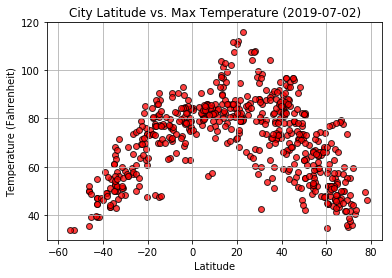

In [167]:
# Plot Figure 1
plt.figure(1)

# Draw Scatter Plot
plt.scatter(complete_df_copy['latitude'], complete_df_copy['max temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Add title and axis labels
plt.title("City Latitude vs. Max Temperature (" + str(date) + ")")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")

# Set the upper and lower limits of our x axis
plt.xlim(-65,85)

# Overlay grid
plt.grid()

# Save figure
plt.savefig("../Images/LatitudeMaxTemp.png")

# Display
plt.show()

#### Latitude vs. Humidity Plot

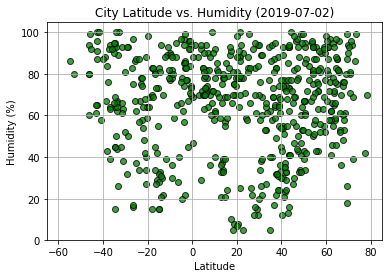

In [168]:
# Plot Figure 2
plt.figure(2)

# Draw Scatter Plot
plt.scatter(complete_df_copy['latitude'], complete_df_copy['humidity'], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# Add title and axis labels
plt.title("City Latitude vs. Humidity (" + str(date) + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Set the upper and lower limits of our x axis
plt.xlim(-65,85)

# Overlay grid
plt.grid()

# Save figure
plt.savefig("../Images/LatitudeHumidity.png")

# Display
plt.show()

#### Latitude vs. Cloudiness Plot

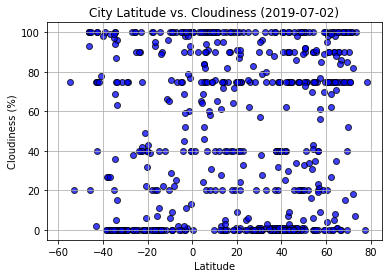

In [169]:
# Plot Figure 3
plt.figure(3)

# Draw Scatter Plot
plt.scatter(complete_df_copy['latitude'], complete_df_copy['cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add title and axis labels
plt.title("City Latitude vs. Cloudiness (" + str(date) + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Set the upper and lower limits of our x axis
plt.xlim(-65,85)

# Overlay grid
plt.grid()

# Save figure
plt.savefig("../Images/LatitudeCloudiness.png")

# Display
plt.show()

#### Latitude vs. Wind Speed Plot

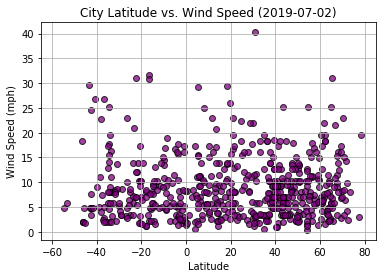

In [170]:
# Plot Figure 4
plt.figure(4)

# Draw Scatter Plot
plt.scatter(complete_df_copy['latitude'], complete_df_copy['wind speed'], marker="o", facecolors="purple", edgecolors="black", alpha=0.75)

# Add title and axis labels
plt.title("City Latitude vs. Wind Speed (" + str(date) + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Set the upper and lower limits of our x axis
plt.xlim(-65,85)

# Overlay grid
plt.grid()

# Save figure
plt.savefig("../Images/LatitudeWindSpeed.png")

# Display
plt.show()